In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Empdata=pd.read_csv("turnover.csv")

In [3]:
Empdata.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
Empdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
Empdata

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


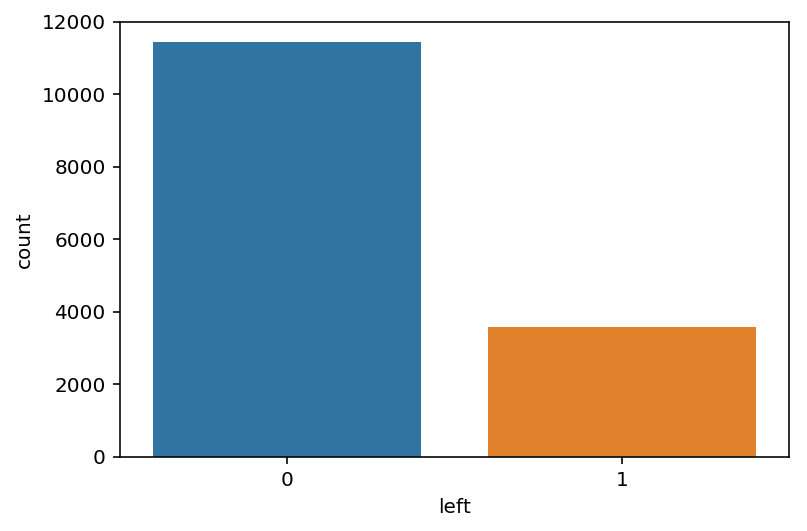

In [6]:
sns.countplot(Empdata.left)

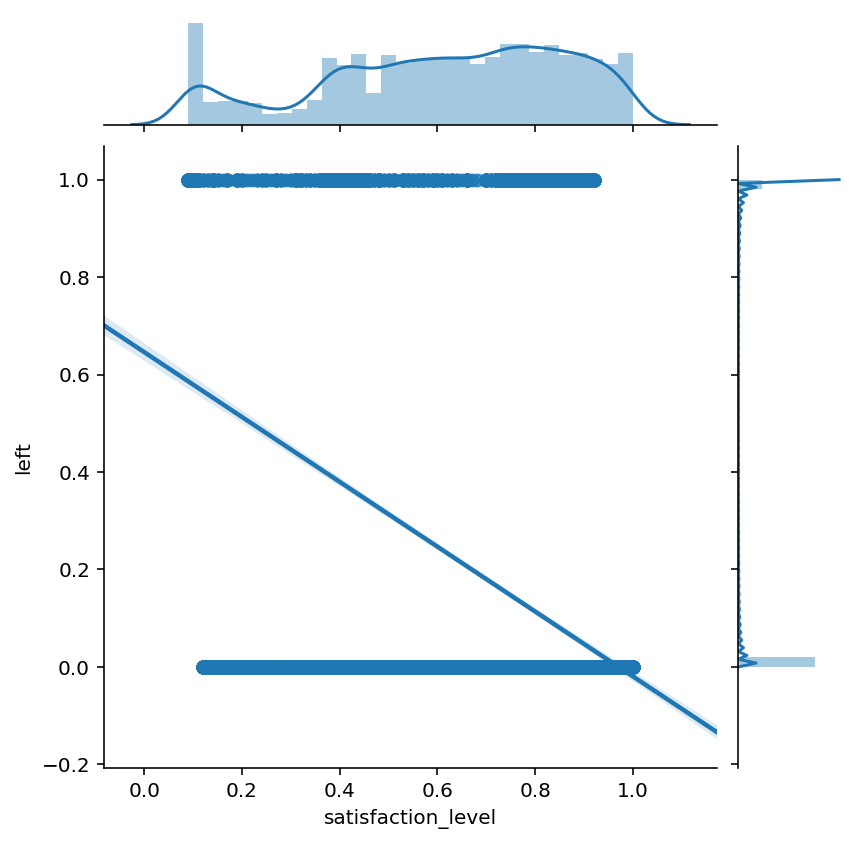

In [8]:
sns.jointplot(x='satisfaction_level', y='left', data=Empdata, kind='reg')

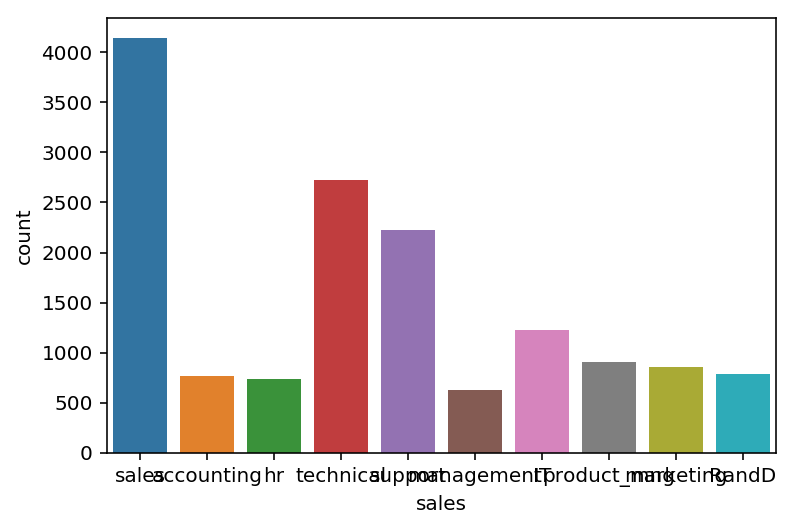

In [9]:
sns.countplot(x='sales', data=Empdata)

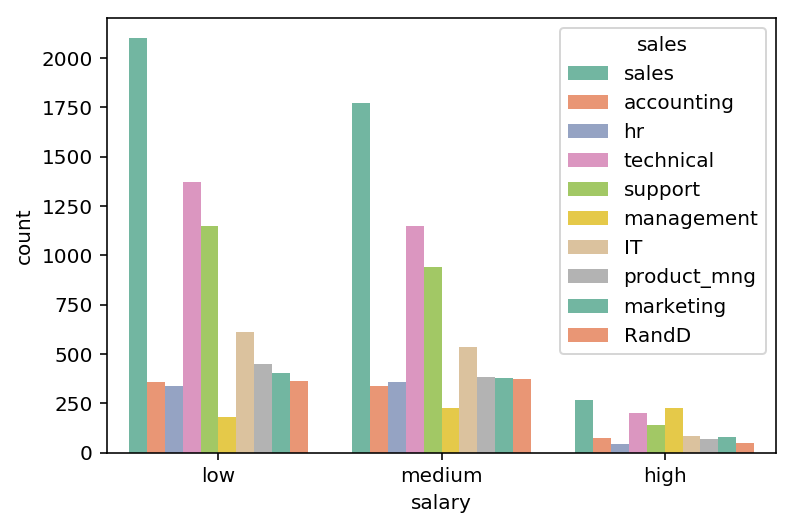

In [10]:
sns.countplot(x='salary', hue='sales', data=Empdata, palette='Set2')

In [11]:
Empdata.salary = Empdata.salary.astype('category').cat.reorder_categories(['low', 'medium', 'high'])

In [13]:
salary_numeric = pd.DataFrame(Empdata.salary.cat.codes)
salary_numeric.columns = ['salary']

Empdata = Empdata.drop(['salary'], 1).join(salary_numeric)

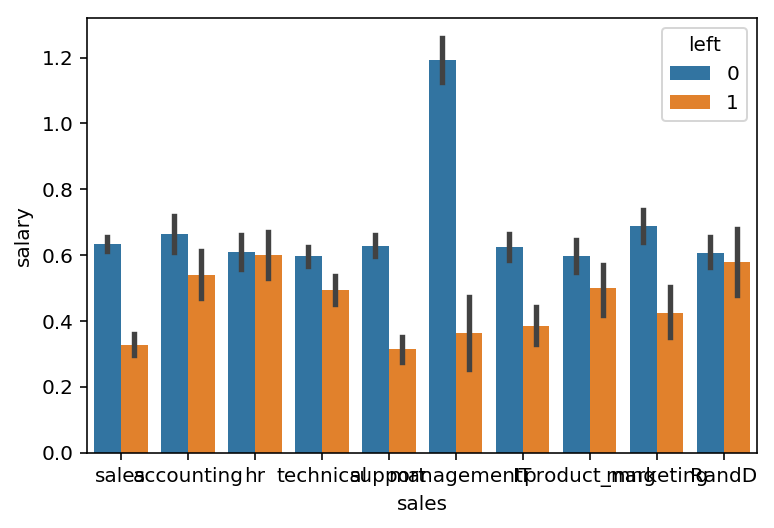

In [14]:
sns.barplot(x='sales', y='salary', hue='left', data=Empdata)

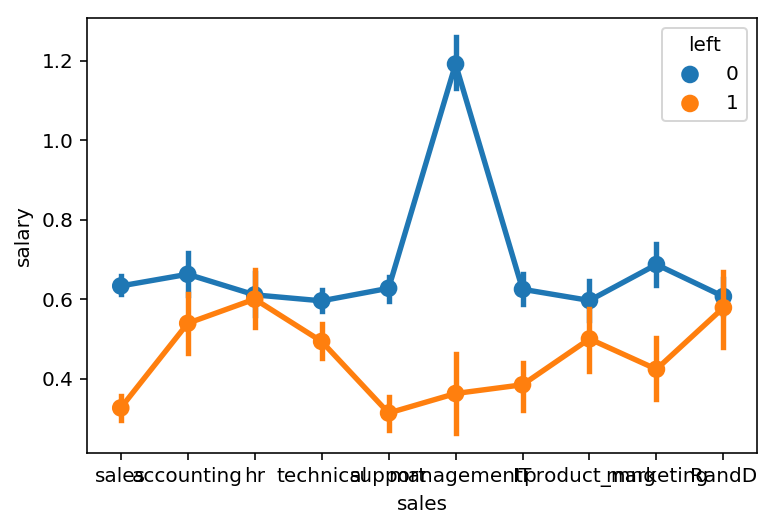

In [15]:
sns.pointplot(x='sales', y='salary', hue='left', data=Empdata)

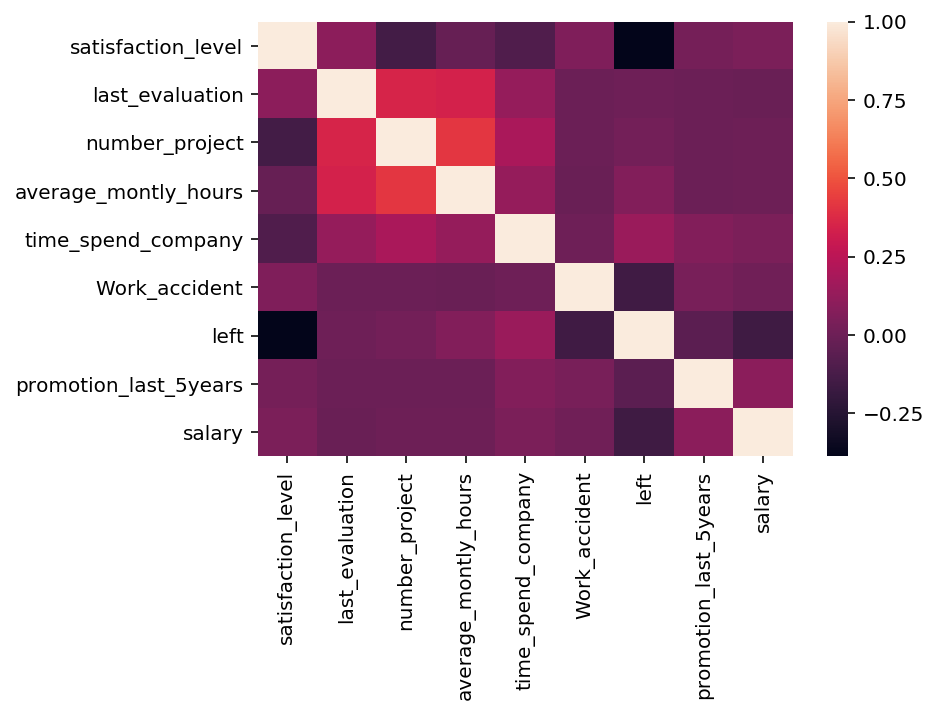

In [16]:
sns.heatmap(Empdata.corr())

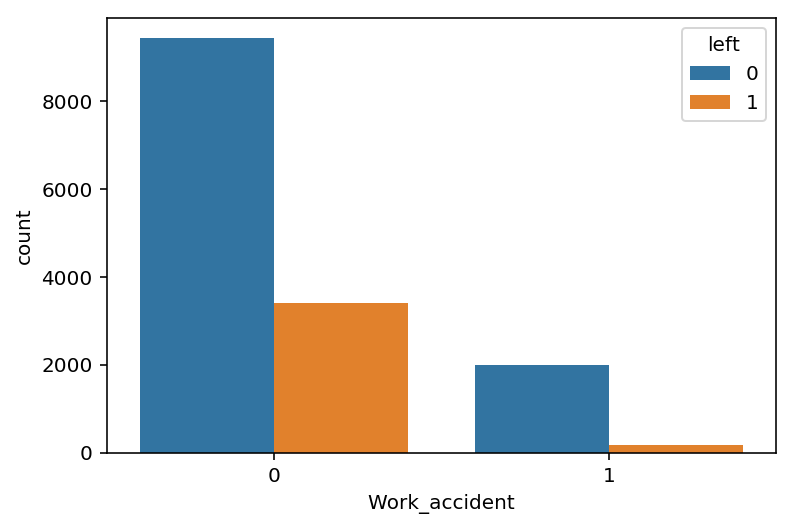

In [17]:
sns.countplot(x='Work_accident', hue='left', data=Empdata)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [19]:
Ranfor = RandomForestClassifier(2000)

In [20]:
sales_dummies = pd.get_dummies(Empdata.sales)

In [21]:
Empdata = Empdata.drop(['sales'], 1).join(sales_dummies)

In [22]:
DropX= Empdata.drop(['left'], 1)
DropY = Empdata.left
DropX_train, DropX_test, DropY_train, DropY_test = train_test_split(DropX, DropY, test_size=.3,
                                                    random_state=6)

In [24]:
Ranfor.fit(DropX_train, DropY_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
print(f"Model accuracy: {Ranfor.score(DropX_test, DropY_test) * 100.}%")

Model accuracy: 98.95555555555555%


In [26]:
pred=Ranfor.predict(DropX_test)

In [27]:
Ranfor.score(DropX_test,DropY_test)

0.9895555555555555

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
conmatrix=confusion_matrix(DropY_test,pred)

In [33]:
conmatrix

array([[3398,    5],
       [  42, 1055]])

In [34]:
classification_report(DropY_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99      3403\n           1       1.00      0.96      0.98      1097\n\n    accuracy                           0.99      4500\n   macro avg       0.99      0.98      0.99      4500\nweighted avg       0.99      0.99      0.99      4500\n'

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
DecTree=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_split=30,random_state=0)

In [40]:
DecTree.fit(DropX_train,DropY_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [43]:
predicts=DecTree.predict(DropX_test)

In [44]:
predicts

array([1, 0, 0, ..., 0, 0, 0])

In [45]:
pd.crosstab(DropY_test,predicts,rownames=['Actual'],colnames=['Predictions'])

Predictions,0,1
Actual,,
0,3397,6
1,88,1009


In [46]:
DecTree.score(DropX_test,DropY_test)

0.9791111111111112

In [57]:
featureImp=pd.DataFrame(data=DecTree.feature_importances_*100.0, columns=["GiniValue"])

In [61]:
featureImp.index=Empdata[::-1]

ValueError: Length mismatch: Expected axis has 18 elements, new values have 14999 elements

In [59]:
featureImp.sort_values(['GiniValue'],axis=0,ascending=False,inplace=True)

In [60]:
featureImp.head()

,GiniValue
0,37.225059
4,22.117982
2,19.643710
1,12.730239
3,7.484668
